In [8]:
import os
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tqdm import tqdm
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import clipboard
import base64
from io import BytesIO
from PIL import Image
from proxyattention.meta_utils import read_pickle


In [6]:
!python result_aggregator.py

100%|████████████████████████████████████████| 441/441 [00:03<00:00, 146.04it/s]


In [9]:
combined_df = read_pickle(fname = "./results/aggregated_runs.csv")[0]
combined_df = combined_df[(~pd.isnull(combined_df['experiment_name'])) & (~pd.isnull(combined_df['Loss/Val']))]
combined_df.head()

,index,proxy_step,Loss/Train,Acc/Train,Loss/Val,Acc/Val,experiment_name,ds_name,image_size,batch_size,...,ds_path,name_fn,global_run_count,label_map,rev_label_map,num_classes,original_images,converted_proxy,Number_Chosen,save_path
0,"runs/asl_blend_test+08032023_16:30:00_ps-[10, ...",0.0,0.478703,0.85625,0.115334,0.96525,blend_test,asl,224,32,...,/mnt/e/Datasets/asl/asl_alphabet_train/asl_alp...,<function get_parent_name at 0x7f817d4d55a0>,0,"{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...","{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...",29,NaN,NaN,NaN,NaN
1,"runs/asl_blend_test+08032023_16:30:00_ps-[10, ...",1.0,0.510605,0.84025,0.14249,0.95675,blend_test,asl,224,32,...,/mnt/e/Datasets/asl/asl_alphabet_train/asl_alp...,<function get_parent_name at 0x7f817d4d55a0>,10,"{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...","{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...",29,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,10.0,/mnt/e/CODE/Github/improving_robotics_datasets...
2,"runs/asl_blend_test+08032023_16:30:00_ps-[10, ...",0.0,0.367487,0.88625,0.036445,0.98925,blend_test,asl,224,32,...,/mnt/e/Datasets/asl/asl_alphabet_train/asl_alp...,<function get_parent_name at 0x7f817d4d55a0>,11,"{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...","{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...",29,NaN,NaN,NaN,/mnt/e/CODE/Github/improving_robotics_datasets...
8,"runs/asl_blend_test+08032023_16:38:51_ps-[10, ...",0.0,0.493784,0.85425,0.111464,0.96925,blend_test,asl,224,32,...,/mnt/e/Datasets/asl/asl_alphabet_train/asl_alp...,<function get_parent_name at 0x7f6bf04815a0>,0,"{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...","{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...",29,NaN,NaN,NaN,NaN
9,"runs/asl_blend_test+08032023_16:38:51_ps-[10, ...",1.0,0.516414,0.84,0.100197,0.967,blend_test,asl,224,32,...,/mnt/e/Datasets/asl/asl_alphabet_train/asl_alp...,<function get_parent_name at 0x7f6bf04815a0>,10,"{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...","{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...",29,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,26.0,/mnt/e/CODE/Github/improving_robotics_datasets...


In [10]:
combined_df.shape

(142, 36)

In [11]:
combined_df[combined_df["global_run_count"]!= "0"]["proxy_steps"].value_counts()

[10, 'p', 10]    54
Name: proxy_steps, dtype: int64

# Image code

In [12]:
filtered_df = combined_df[(~pd.isnull(combined_df['converted_proxy'])) & (~pd.isnull(combined_df['original_images']))]

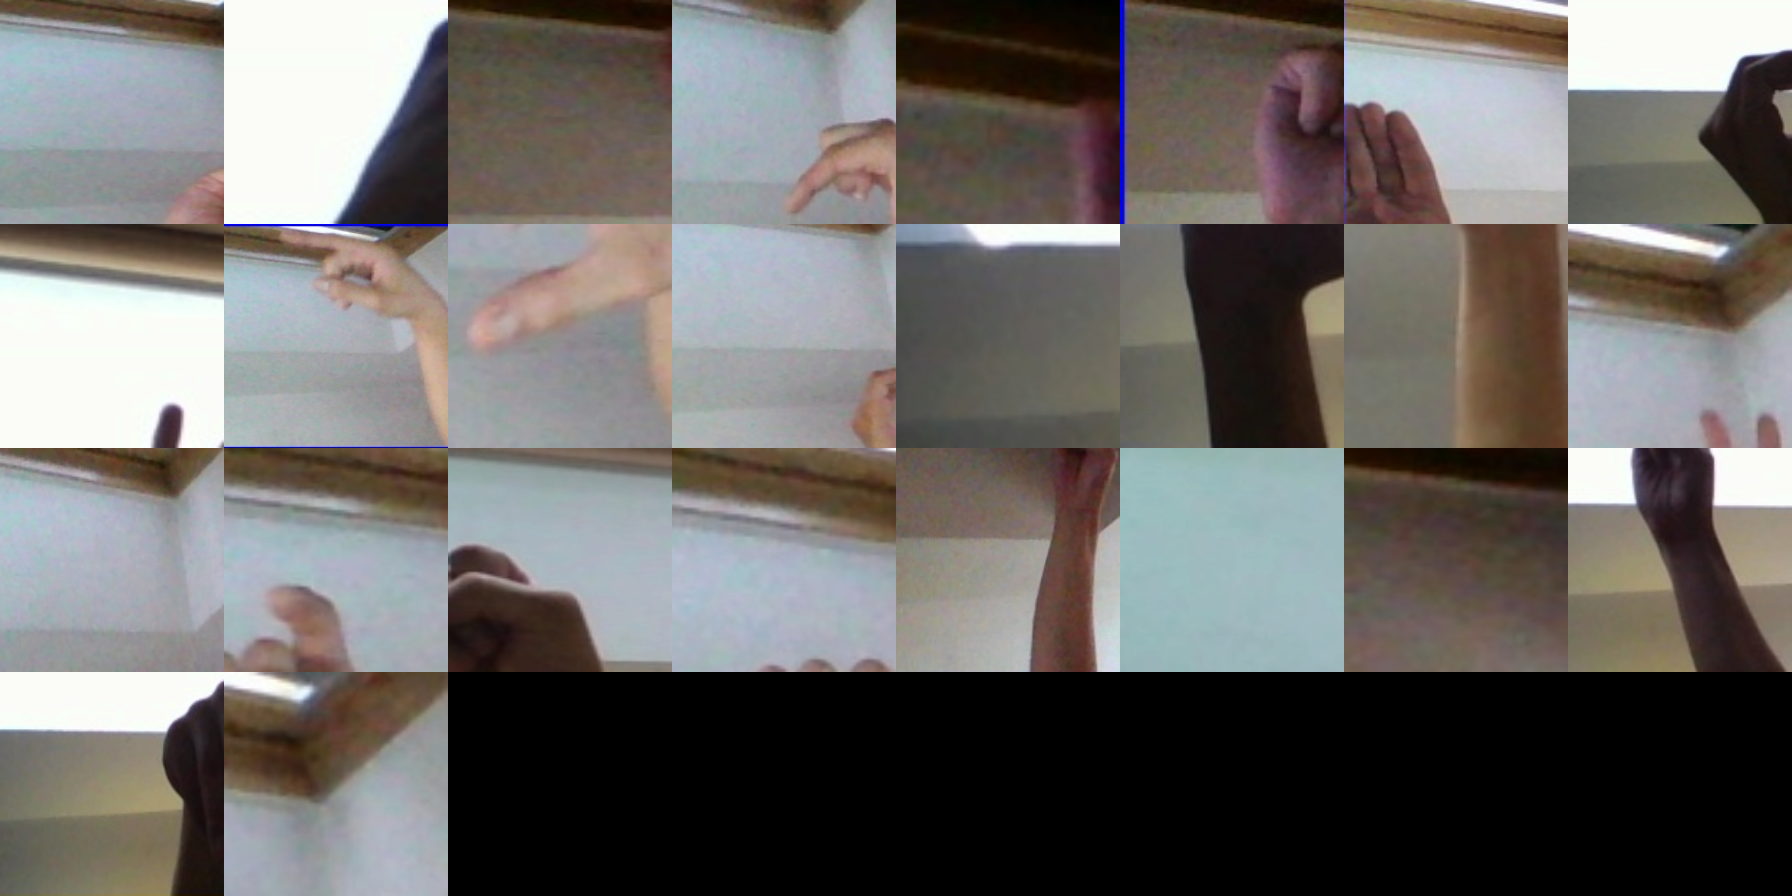

In [13]:
filtered_df.iloc[1].original_images

In [14]:
filtered_df.iloc[1].converted_proxy

# Preprocess

In [ ]:
def check_proxy(string): return "p" in string

In [ ]:
def calc_stats(values):
    return f"min: {values.min()} \nmax: {values.max()} \navg: {values.mean()}"

In [3]:
def convert_float(df, cols, totype= float):
    for col in cols:
        df[col] = df[col].astype(totype)

In [5]:
combined_df = combined_df.fillna(0)
# col to check for proxy
# combined_df["has_proxy"] = combined_df["proxy_steps"].apply(check_proxy)
# Fix naming
combined_df = combined_df.rename(columns={"Acc/Val":"accuracy", "proxy_steps":"step_schedule"})
# Fix types
convert_float(combined_df, ["change_subset_attention", "proxy_threshold", "accuracy"], float)
convert_float(combined_df, ["global_run_count"], int)
convert_float(combined_df, ["transfer_imagenet"], bool)

# ignore failed runs
combined_df = combined_df[combined_df["global_run_count"]!=0]


NameError: name 'combined_df' is not defined

# Grouped Results

In [21]:
def return_grouped_results(df, group_cols ,filter = None, index_cols = (["ds_name", ("accuracy")]), print_latex = False):
    if filter != None:
        df = df.reset_index()
        for key in filter.keys():
            df = df[df[key] == filter[key]]
    final_df = pd.DataFrame(df.groupby(group_cols, as_index=True).mean(numeric_only = True)["accuracy"]).sort_values(index_cols, ascending=False)
    if print_latex == True:
        clipboard.copy(final_df.to_latex())

    return final_df



In [24]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule"], filter = {"transfer_imagenet":True , "ds_name":"asl"})

,,,,,accuracy
ds_name,pixel_replacement_method,transfer_imagenet,gradient_method,step_schedule,
asl,blended,True,gradcamplusplus,"[10, 'p', 10]",0.966371


In [14]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule", "global_run_count"])

accuracy
ds_name    pixel_replacement_method transfer_imagenet gradient_method step_schedule global_run_count          
imagenette blended                  True              gradcamplusplus [10, 'p', 10] 11                0.710021
                                                                                    10                0.662625
asl        blended                  True              gradcamplusplus [10, 'p', 10] 11                0.969076
                                                                                    10                0.963667

In [15]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "change_subset_attention", "step_schedule"])

accuracy
ds_name    pixel_replacement_method transfer_imagenet gradient_method change_subset_attention step_schedule          
imagenette blended                  True              gradcamplusplus 0.8                     [10, 'p', 10]  0.686323
asl        blended                  True              gradcamplusplus 0.3                     [10, 'p', 10]  0.973000
                                                                      0.8                     [10, 'p', 10]  0.963057

# Compare CAM

In [94]:
test_models = return_grouped_results(combined_df, ["index","ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule", "model", "num_classes"], filter = {"transfer_imagenet":True })

test_models = test_models.reset_index()

In [95]:
model_1, model_2 = test_models.loc[:1].values

In [96]:
model_1

array(["runs/imagenette_threshold_test+09032023_11:37:11_ps-[10, 'p', 10]_gradient-gradcamplusplus_px-blended-subs-0.8_pt-0.5723034991510582_cs-True/events.out.tfevents.1678358581.Eragon.19906.22",
       'imagenette', 'blended', True, 'gradcamplusplus', "[10, 'p', 10]",
       'resnet18', '10', 0.7462499737739563], dtype=object)

In [113]:
import torch
from proxyattention.training import choose_network, perform_proxy_step

import albumentations as A

from albumentations.pytorch import ToTensorV2
from proxyattention.data_utils import ImageClassDs, create_folds, get_parent_name

In [129]:
arch_1 = choose_network({"model":model_1[-3] , "transfer_imagenet":False, "num_classes": int(model_1[-2]), "device":"cpu"})
model_weights = torch.load(Path(model_1[0]).parent/"checkpoint", map_location='cpu')
arch_1.load_state_dict(model_weights['model_state_dict'])
arch_1.eval();

In [126]:
config = {"image_size": 224, "subset_images":100, "load_proxy_data":False, "name_fn":get_parent_name, "ds_path": "/Users/eragon/Documents/CODE/Datasets/imagenette2-320/val", "batch_size":10}

In [118]:
data_transforms = A.Compose(
            [
                A.Resize(config["image_size"], config["image_size"]),
                A.CenterCrop(config["image_size"], config["image_size"], p=1.0),
                A.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225],
                    max_pixel_value=255.0,
                    p=1.0,
                ),
                ToTensorV2(p=1.0),
            ],
            p=1.0,
        ),


In [119]:
val = create_folds(config=config)

In [123]:
image_datasets = ImageClassDs(
            val[0], config["ds_path"], train=False, transforms=data_transforms
        ),


In [127]:
val_dls = torch.utils.data.DataLoader(
        image_datasets,
        batch_size=config["batch_size"],
        shuffle=False,
        num_workers=8,
    ),


In [1]:
arch_1(val_dls)

NameError: name 'arch_1' is not defined